# classification model using SVM for salary data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
sal_train = pd.read_csv("C:\\Users\\Anks\\Downloads\\SalaryData_Train(1).csv")
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
sal_test = pd.read_csv("C:\\Users\\Anks\\Downloads\\SalaryData_Test(1).csv")
sal_test.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
sal_train["Salary"]

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [8]:
# Categoring dataset as per Salary range :
salary_set = set(sal_train["Salary"])
print(salary_set)

{' >50K', ' <=50K'}


In [9]:
# As expected transforming :
salary_map = {' >50K':1,' <=50K':0 }
sal_train["Salary"] = sal_train["Salary"].map(salary_map)
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


<AxesSubplot:xlabel='education'>

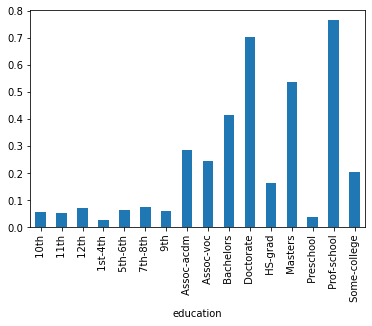

In [10]:
sal_train.groupby("education").Salary.mean().plot(kind="bar")

<AxesSubplot:xlabel='occupation'>

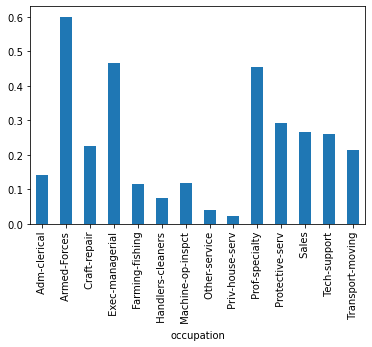

In [11]:
sal_train.groupby("occupation").Salary.mean().plot(kind="bar")

In [12]:
occupation_set = set(sal_train["occupation"])
print(occupation_set)

{' Protective-serv', ' Exec-managerial', ' Priv-house-serv', ' Adm-clerical', ' Machine-op-inspct', ' Sales', ' Handlers-cleaners', ' Farming-fishing', ' Tech-support', ' Armed-Forces', ' Prof-specialty', ' Other-service', ' Transport-moving', ' Craft-repair'}


In [13]:
sal_train["occupation"] = sal_train["occupation"].map({' Transport-moving':0, ' Tech-support':1, ' Handlers-cleaners':2, ' Armed-Forces':3, ' Craft-repair':4, ' Machine-op-inspct':5, ' Exec-managerial':6, ' Farming-fishing':7, ' Priv-house-serv':8, ' Prof-specialty':9, ' Adm-clerical':10, ' Other-service':11, ' Protective-serv':12, ' Sales':13}).astype(int)


In [14]:
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,5,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,7,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,12,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,5,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,11,Not-in-family,White,Male,0,0,30,United-States,0


In [15]:
occupation_set = set(sal_test["occupation"])
print(occupation_set)

{' Protective-serv', ' Exec-managerial', ' Priv-house-serv', ' Adm-clerical', ' Machine-op-inspct', ' Sales', ' Handlers-cleaners', ' Farming-fishing', ' Tech-support', ' Armed-Forces', ' Prof-specialty', ' Other-service', ' Transport-moving', ' Craft-repair'}


In [16]:
sal_test["occupation"] = sal_test["occupation"].map({' Transport-moving':0, ' Tech-support':1, ' Handlers-cleaners':2, ' Armed-Forces':3, ' Craft-repair':4, ' Machine-op-inspct':5, ' Sales':13, ' Exec-managerial':6, ' Priv-house-serv':8, ' Farming-fishing':7, ' Prof-specialty':9, ' Other-service':11, ' Protective-serv':12, ' Adm-clerical':10}).astype(int)
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,5,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,7,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,12,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,5,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,11,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [17]:
# As expected transforming :
salary_map = {' >50K':1,' <=50K':0 }
sal_test["Salary"] = sal_test["Salary"].map(salary_map)
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,5,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,7,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,12,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,5,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,11,Not-in-family,White,Male,0,0,30,United-States,0


In [18]:
X_train = sal_train[["educationno","occupation"]]
Y_train = sal_train["Salary"]
X_test = sal_test[["educationno","occupation"]] 
Y_test = sal_test["Salary"]


In [19]:
from sklearn import svm
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train,Y_train)



SVC()

In [20]:
score = classifier.score(X_test,Y_test)
print(score)

0.7747675962815405
